In [1]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP13 : COURBES ELLIPTIQUES                                                  #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
# ADDITION DANS UNE COURBE ELLIPTIQUE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

p = 61
Fp = FiniteField(p)
E = EllipticCurve(Fp,[1,0])
P = E.random_point()
Q = E.random_point()

# Code pour l'EXERCICE

def addition(P,Q):
    E = P.curve()
    Fp = E.base_ring()
    a = E.a4()
    b = E.a6()
    xp, yp = P.xy()
    xq, yq = Q.xy()  
    if P != Q and P!=-Q :
        lamb = (yq-yp)/(xq-xp)
    elif P==Q :
        lamb = (3*xp^2+a)/2*yp
    else : # on est dans le cas P = -Q
        return E(0)
    x = lamb^2 - xp - xq
    y = -yp + lamb*(xp-x)
    return E(x,y) #FAIRE LE CALCUL DU POINT

# # Affichage des resultats

print(f'Notre méthode donne pour résultat : {addition(P,Q)}')
print(f"Sagemath donne {P+Q}")


reset()

# *************************************************************************** #
# *************************************************************************** #
# TP13 : COURBES ELLIPTIQUES                                                  #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# ADDITION DANS UNE COURBE ELLIPTIQUE
# ****************************************************************************

Notre méthode donne pour résultat : (10 : 41 : 1)
Sagemath donne (10 : 41 : 1)


In [7]:
print("""\
# ****************************************************************************
# COURBE DE L'ANSSI
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


# Code pour l'EXERCICE

ANSSI = "Agence nationale de la sécurité des systèmes d'information"
p = Integer("F1FD178C0B3AD58F10126DE8CE42435B3961ADBCABC8CA6DE8FCF353D86E9C03",16)
a = Integer("F1FD178C0B3AD58F10126DE8CE42435B3961ADBCABC8CA6DE8FCF353D86E9C00",16)
b = Integer("EE353FCA5428A9300D4ABA754A44C00FDFEC0C9AE4B1A1803075ED967B7BB73F",16)
E = EllipticCurve(FiniteField(p),[a,b])

# # Affichage des resultats

print("ANSSI signifie :",ANSSI)
print("La courbe recommandée est")
print(E) 
print("Le nombre de points est : ", E.cardinality())
print(p.is_prime())




reset()

# ****************************************************************************
# COURBE DE L'ANSSI
# ****************************************************************************

ANSSI signifie : Agence nationale de la sécurité des systèmes d'information
La courbe recommandée est
Elliptic Curve defined by y^2 = x^3 + 109454571331697278617670725030735128145969349647868738157201323556196022393856*x + 107744541122042688792155207242782455150382764043089114141096634497567301547839 over Finite Field of size 109454571331697278617670725030735128145969349647868738157201323556196022393859
Le nombre de points est :  109454571331697278617670725030735128146004546811402412653072203207726079563233
True


# ****************************************************************************
# COMPTAGE DE POINTS
# ****************************************************************************

Résultat de l'algorithme naif : 1995
Résulat de Sage : 1995


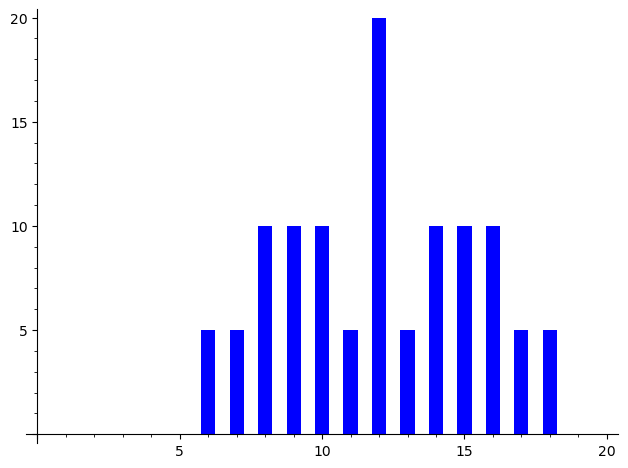

In [20]:
print("""\
# ****************************************************************************
# COMPTAGE DE POINTS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

p = 2003
Fp = FiniteField(p)
a = 1929
b = 1178

while true:
    d=Fp.random_element()
    if not d.is_square():
        break


# Code pour l'EXERCICE

def comptage(a,b):
    Pol.<x> = PolynomialRing(Fp)
    points = set()
    for y in Fp :
        f = x^3 + a*x + b -y^2
        roots = f.roots()
        for xx in roots :
            points.add((xx[0],y))
    return len(points)+1 # il faut rajouter le point à l'infini

p = 11
Fp = FiniteField(p)    
    
frequence = [0 for _ in range(p+1+2*ceil(sqrt(p)))]
    
for aa in Fp :
    for bb in Fp :
        if -(4*aa^3 + 27*bb^2) != Fp(0) :
            n = EllipticCurve(Fp,[aa,bb]).cardinality()
            frequence[n]+=1

p = 2003
Fp = FiniteField(p)       
            
# # Affichage des resultats

print("Résultat de l'algorithme naif :", comptage(a,b))
print("Résulat de Sage :", EllipticCurve(Fp,[a,b]).cardinality())
BarChart = bar_chart(frequence)
show(BarChart)

reset()

In [22]:
print("""\
# ****************************************************************************
# FACTORISATION ECM
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

class FoundFactor(Exception):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return repr(self.value)

n = 2020

# Code pour l'EXERCICE

def division(x,y):
    try :
        quotient = x/y
        return quotient
    except ZeroDivisionError :
        raise FoundFactor(y)

def addition(P,Q):
    E = P.curve()
    Fp = E.base_ring()
    a = E.a4()
    b = E.a6()
    if P == 0 :
        return Q
    elif Q == 0 :
        return P
    try :
        xp, yp = P.xy()
    except ZeroDivisionError : # la troisième coordonnée projective du point n'est pas inversible
        factor = P[2]
        raise FoundFactor(factor)
    try :
        xq, yq = Q.xy()
    except ZeroDivisionError : # idem
        factor = Q[3]
        raise FoundFactor(factor)  
    if P != Q and P!=-Q :
        lamb = division((yq-yp),(xq-xp))
    elif P==Q :
        lamb = division((3*xp^2+a),2*yp)
    else : # on est dans le cas P = -Q
        return E(0)
    x = lamb^2 - xp - xq
    y = -yp + lamb*(xp-x)
    return E(x,y)

       
    
def multiplication(lamb,P): 
    E = P.curve()
    if lamb == 0 :
        return E(0)
    elif lamb%2 == 0:
        return multiplication(addition(P,P),lamb//2)
    else :
        return addition(multiplication(addition(P,P),lamb//2),P)

    

def ECM(n,B):
    Zn = Zmod(n)
    a, x0, y0 = Zn.random_element(), Zn.random_element(), Zn.random_element()
    b = y0^2 - x0^3 - a*x0
    g = gcd(4*a^3+27*b^2,n)
    if g > 1 and g < n :
        return g
    elif g == n :
        return None
    E = EllipticCurve(Zn,[a,b])
    A = E(x0,y0)
    for p in Primes(B) :
        e = 1
        while p^e <= B :
            e+=1
        try :
            A = multiplication(p^e,A)
        except FoundFactor as ex :
            factor = ex.value
            return gcd(factor,n)   
    return None


# # Affichage des resultats

print(ECM(n,15))


reset()

# ****************************************************************************
# FACTORISATION ECM
# ****************************************************************************

4


In [19]:
print("""\
# ****************************************************************************
# EXPONENTIATION RAPIDE ET ATTAQUE PAR CANAUX CACHES
# ****************************************************************************
""")

# NE PAS TRAITER



reset()

# ****************************************************************************
# EXPONENTIATION RAPIDE ET ATTAQUE PAR CANAUX CACHES
# ****************************************************************************



In [24]:
print("""\
# ****************************************************************************
# COURBE D'EDWARDS
# ****************************************************************************
""")



# Code pour l'EXERCICE

reponse = "L'avantage est que les formules d'addition ne dépendent pas de si P=Q, ce qui évite donc les attaques par canaux auxiliaires car il n'y a pas de disjonction de cas"

# # Affichage des resultats

print(reponse)



# ****************************************************************************
# COURBE D'EDWARDS
# ****************************************************************************

L'avantage est que les formules d'addition ne dépendent pas de si P=Q, ce qui évite donc les attaques par canaux auxiliaires car il n'y a pas de disjonction de cas
